# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!wget -nc https://raw.githubusercontent.com/udacity/workspaces-student-support/master/jupyter/workspace_utils.py

File ‘workspace_utils.py’ already there; not retrieving.



In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.7 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [6]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [29]:
env.close()

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.1749999960884452


In [6]:
actions

array([[ 0.35160131,  0.10521094,  0.21605266,  0.93829515],
       [-0.28726073, -0.35320944, -0.39547867, -0.13646872],
       [ 1.        ,  0.64406365, -0.68794785,  0.97956227],
       [ 1.        , -0.14965131, -1.        , -1.        ],
       [ 1.        , -0.23707004, -0.36800187, -0.13677849],
       [-1.        , -1.        , -1.        ,  0.88921525],
       [-0.51748671,  0.51755702,  0.3977073 ,  1.        ],
       [ 0.01362152, -0.88123783,  0.10753753, -1.        ],
       [ 0.15482762, -0.28813375, -0.77047758,  1.        ],
       [ 1.        ,  0.81551638, -0.97047839,  0.81395775],
       [-0.74308619,  0.68918674,  0.69706807,  0.90340483],
       [-0.3636276 ,  1.        ,  1.        , -0.41699375],
       [-0.8151905 , -0.23255009, -0.27767549,  0.41615922],
       [ 0.10873611, -0.54206269, -0.75401583,  1.        ],
       [-0.104582  , -0.14955657, -0.4912189 , -0.57814513],
       [-0.96538843, -0.59631172, -0.80666971, -0.03624637],
       [-0.80000636,  1.

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

## Setting up the environment

In [3]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_dim = brain.vector_action_space_size
print('Size of each action:', action_dim)

# examine the state space 
states = env_info.vector_observations
state_dim = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_dim))
print('The state for the first agent looks like:\n{}'.format(states[0]))

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like:
[  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import MultivariateNormal, Normal
import time

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


## Trying A2C model

Inspired by the work descirbed in the following url: https://towardsdatascience.com/rl-train-the-robotic-arm-to-reach-a-ball-part-02-fc8822ace1d8

I modified as follows:
- enabled use of variable static standard deviation instead of hard-coded 1.0 - using 0.5 - 0.6 seemed to improved learning  by about double
- adjusted the loss formula by adding `0.5 * ` term to the c_loss as per following urls: 

     - https://towardsdatascience.com/understanding-actor-critic-methods-931b97b6df3f
     - https://github.com/higgsfield/RL-Adventure-2/blob/master/1.actor-critic.ipynb
- updated the neural network archtiecture to have 128 weights for first two fully connected layers

In [7]:
N_INPUTS = 33
N_ACTIONS = 4
GAMMA = 0.99 # reward discount rate
std = 0.5 # used to determine the spread of actions from a Normal distribution (mu's come from Actor NN output)

In [8]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

# create helper function to plot rewards over episodes
def plot(rewards):
    clear_output(True)
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    #plt.title('frame %s. reward: %s' % (frame_idx, rewards[-1]))
    plt.xlabel('Episodes')
    plt.ylabel('Average score across agents')
    plt.plot(rewards)
    plt.show()

In [9]:
class A2CModel(nn.Module):
    def __init__(self):
        super(A2CModel, self).__init__()
        self.fc1 = nn.Linear(N_INPUTS, 128)
        self.fc2 = nn.Linear(128, 128)
        self.actor = nn.Linear(128, N_ACTIONS)
        self.critic = nn.Linear(128, 1)
        self.std = (std * torch.ones(N_ACTIONS)).to(device)
        self.dist = torch.distributions.Normal

    def forward(self, s):
        '''
        Function instantiates the first two layers of the neural network that is shared 
            by both the Actor and Critic
            
        Params
        ======
            s (n_process, state_size) (tensor): states
        '''
        
        s = F.relu(self.fc1(s))
        s = F.relu(self.fc2(s))

        return s
    
    def get_action(self, s):
        '''
        Function employs the Actor to generate actions from input states
        
        Params
        ======
            s (n_process, state_size) (tensor): states
        Returns
        ======
            action_tanh (n_process, action_size) (tensor): action limited within (-1,1)
            action (n_process, action_size) (tensor): raw action
        '''
        s = self.forward(s)
        mu = self.actor(s)
        dist_ = self.dist(mu, self.std)
        action = dist_.sample()
        action_tanh = F.tanh(action)
        return action_tanh, action
    
    def get_action_prob(self, s, a):
        '''
        Function generates the action probabilities from actions generated from the Actor
        
        Params
        ======
            s (n_process, state_size) (tensor): states
            a (n_process, action_size) (tensor): actions
        
        Returns
        =======
            mu (n_process, action_size) (tensor): mean value of action distribution
            self.std (action_size,) (tensor): the standard deviation of every action
            log_prob (n_process,) (tensor): log probability of input action
        '''
        
        s = self.forward(s)
        mu = self.actor(s)
        dist_ = self.dist(mu, self.std)
        log_prob  = dist_.log_prob(a)
        log_prob = torch.sum(log_prob, dim=1, keepdim=False)
        entropy = dist_.entropy
        return mu, self.std, log_prob, entropy
        
    def get_state_value(self, s):
        '''
        Function employes the Critic to generate a baseline value to assess Actor performance
        
        Params
        ======
            s (n_process, state_size) (tensor): states
        Returns
        =======
            value (n_process,) (tensor)
        '''
        s = self.forward(s)
        value = self.critic(s).squeeze(1)
        return value

def collect_trajectories(model, env, brain_name, init_states, episode_end, n_steps):
    '''
    Function generates a set of trajectories of length n_steps from the envionment that is passed 
        in as env[brain_name] and actions generated throug the Actor model. It also keeps track 
        of whether the episode is completed and if so resets the environment state.
    
    Params
    ======
        model (object): A2C model
        env (object): environment
        brain_name (string): brain name of environment
        init_states (n_process, state_size) (numpy): initial states for loop
        episode_end (bool): tracker of episode end, default False
        n_steps (int): number of steps for reward collection
    Returns
    =======
        batch_s (T, n_process, state_size) (numpy): batch of states
        batch_a (T, n_process, action_size) (numpy): batch of actions
        batch_v_t (T, n_process) (numpy): batch of n-step rewards (aks target value)
        accu_rewards (n_process,) (numpy): accumulated rewards for process (being summed up on all process)
        init_states (n_process, state_size) (numpy): initial states for next batch
        episode_end (bool): tracker of episode end
    '''
    
    # initiate lists to capture the trajectors for states, actions, and rewards
    batch_s = []
    batch_a = []
    batch_r = []

    states = init_states
    accu_rewards = np.zeros(init_states.shape[0])

    t = 0
    while True:
        t += 1

        model.eval()
        with torch.no_grad():
            states = torch.from_numpy(states).float().to(device)
            actions_tanh, actions = model.get_action(states)
        model.train()
        # actions_tanh (n_process, action_size) (tensor), actions limited within (-1,1)
        # actions (n_process, action_size) (tensor)
        
        env_info = env.step(actions_tanh.cpu().data.numpy())[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        # next_states (numpy array)
        # rewards (list)
        # dones (list)
        rewards = np.array(rewards)
        dones = np.array(dones)
        
        accu_rewards += rewards

        batch_s.append(states.cpu().data.numpy()) # final shape of batch_s (T, n_process, state_size) (list of numpy)
        batch_a.append(actions.cpu().data.numpy()) # final shape of batch_a (T, n_process, action_size) (list of numpy)
        batch_r.append(rewards) # final shape of batch_r (T, n_process) (list of numpy array)

        if dones.any() or t >= n_steps:
            model.eval()
            next_states = torch.from_numpy(next_states).float().to(device)
            final_r = model.get_state_value(next_states).detach().cpu().data.numpy() # final_r (n_process,) (numpy)
            model.train()

            for i in range(len(dones)):
                if dones[i] == True:
                    final_r[i] = 0
                else:
                    final_r[i] = final_r[i]

            # compute discounted n-step future rewards (aks target value) 
            batch_v_t = [] 
            batch_r = np.array(batch_r)
            
            for r in batch_r[::-1]:
                mean = np.mean(r)
                std = np.std(r)
                r = (r - mean)/(std+0.0001) # normalize rewards in n_process on each timestep
                final_r = r + GAMMA * final_r
                batch_v_t.append(final_r)
            batch_v_t = np.array(batch_v_t)[::-1] # final shape (T, n_process) (numpy)

            break

        states = next_states

    if dones.any():
        env_info = env.reset(train_mode=True)[brain_name]
        init_states = env_info.vector_observations
        episode_end = True
        
    else:
        init_states = next_states.cpu().data.numpy() # if not done, continue batch collection from last states

    batch_s = np.stack(batch_s)
    batch_a = np.stack(batch_a)

    return batch_s, batch_a, batch_v_t, np.sum(accu_rewards), init_states, episode_end


def learn(batch_s, batch_a, batch_v_t, model, optimizer):
    '''
    Function computes the loss and usng passed optimizer (default is Adam) employes gradient
        descent to update the model weigths.  The loss is comprised of both the advantage function loss
        and the critic loss.
    
    Params
    ======
        batch_s (T, n_process, state_size) (numpy)
        batch_a (T, n_process, action_size) (numpy): batch of actions
        batch_v_t (T, n_process) (numpy): batch of n-step rewards (aks target value)
        model (object): A2C model
        optimizer (object): model parameter optimizer
    Returns
    ======
        total_loss (int): mean actor-critic loss for each batch 
    '''

    # convert to tensors
    batch_s_ = torch.from_numpy(batch_s).float().to(device)
    batch_s_ = batch_s_.view(-1, batch_s.shape[-1]) # shape from (T,n_process,state_size) -> (TxN, state_size)

    batch_a_ = torch.from_numpy(batch_a).float().to(device)
    batch_a_ = batch_a_.view(-1, batch_a.shape[-1]) # shape from (T,n_process,action_size) -> (TxN, action_size)

    # generated critic values
    values = model.get_state_value(batch_s_) # shape (TxN,) - from the critic
    values = values.view(*batch_s.shape[:2]) # shape (T,n) - resphape back to T and n_processes

    # pytorch's problem of negative stride -> require .copy() to create new numpy
    batch_v_t_ = torch.from_numpy(batch_v_t.copy()).float().to(device)
    
    # calculate MSE loss between critic values and discounted values from trajectories
    td = batch_v_t_ - values # shape (T, n_process) (tensor)
    c_loss = 0.5 * td.pow(2).mean()

    mus, stds, log_probs, entropy = model.get_action_prob(batch_s_, batch_a_)
    log_probs_ = log_probs.view(*batch_a.shape[:2]) # shape from (TxN,) -> (T,n) (tensor) - resphape back to T and n_processes

    a_loss = -((log_probs_ * td.detach()).mean())
    total_loss = a_loss + c_loss

    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    # stds is constnat -> no gradient, no detach()
    return total_loss.detach().cpu().data.numpy(), mus.detach().cpu().data.numpy(), stds.cpu().data.numpy()

In [19]:
from collections import deque
from workspace_utils import active_session

torch.backends.cudnn.deterministic = True
torch.manual_seed(999)

agent_a2c = A2CModel().to(device)
optimizer = torch.optim.Adam(agent_a2c.parameters(), lr=0.00015)

env_info = env.reset(train_mode=True)[brain_name] 
states = env_info.vector_observations
init_states = states

n_episodes = 1
n_steps = 10
episode_end = False
a2c_ep_rewards_list = []
ep_rewards_deque = deque([0], maxlen=100) # initialize with 0
ep_rewards = 0
max_episodes = 1000
tic = time.perf_counter()

with active_session():
    while True:
        
        # generate trajectories for n_steps
        batch_s, batch_a, batch_v_t, accu_rewards, init_states, episode_end = collect_trajectories(
            agent_a2c, env, brain_name, init_states, episode_end, n_steps)
    
        # use the trajectories to learn better weights
        loss, mus, stds = learn(batch_s, batch_a, batch_v_t, agent_a2c, optimizer)
        ep_rewards += accu_rewards
        print('\rEpisode {:>4}\tEpisodic Score {:>7.3f}\tCurrent Score {:>7.3f}\tLoss {:>12.6f}\t'.format(
            n_episodes, np.mean(ep_rewards_deque), ep_rewards_deque[-1], float(loss)), end="")

        if episode_end:
            
            a2c_ep_rewards_list.append(ep_rewards/num_agents)
            ep_rewards_deque.append(ep_rewards/num_agents)
            
            if n_episodes % 100 == 0:
                toc = time.perf_counter()
                print('\rEpisode {:>4}\tEpisodic Score {:>7.3f}\tCurrent Score {:>7.3f}\tLoss {:>12.6f}\tTime {:>4} sec'.format(
                    n_episodes, np.mean(ep_rewards_deque), ep_rewards_deque[-1], float(loss), int(toc-tic)))
                tic = time.perf_counter()

            if np.mean(ep_rewards_deque) >= 30:
                print('\nSolved at episode {}'.format(n_episodes - 100))
                break
            if n_episodes > max_episodes:
                print('\nDid not solve, achieved a high averaged score of {:>7.3f}'.format(np.mean(ep_rewards_deque)))
                break

            ep_rewards = 0
            n_episodes += 1
            episode_end = False
                
    # save a2c model
    pth = 'a2c_checkpoint_std_' + str(std) + '.pth'
    torch.save(agent_a2c.state_dict(), pth)

    a2c_ep_rewards_list = np.array(a2c_ep_rewards_list)
    np.save('a2c_ep_rewards_list_std_' + str(std) + '.npy', a2c_ep_rewards_list)

Episode  100	Episodic Score   4.829	Current Score   9.427	Loss    58.321217	Time  458 sec
Episode  200	Episodic Score  16.266	Current Score  21.335	Loss   238.251968	Time  472 sec
Episode  300	Episodic Score  25.019	Current Score  30.502	Loss   249.535690	Time  459 sec
Episode  363	Episodic Score  29.947	Current Score  33.970	Loss   537.094910	
Solved at episode 263


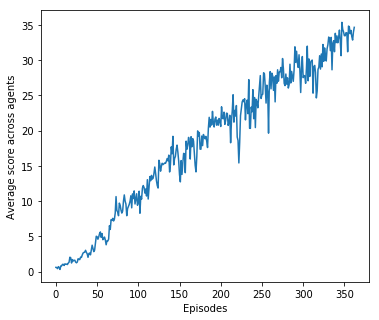

In [20]:
plot(a2c_ep_rewards_list)

I ran the above code several times and acheived the target score between 100 and 400 episodes.  I assume the environment is sufficiently complex with substantial areas of small gradients, the algorithm randomly explores portions of the environment before finding a good gradient that eventually achieves the desired score.

## Trying A2C model with different sigma

I'm trying a slightly higher sigma that is based off the OpenAI spinning up repo - url: https://github.com/openai/spinningup/blob/master/spinup/algos/pytorch/ppo/core.py

In [12]:
N_INPUTS = 33
N_ACTIONS = 4
GAMMA = 0.99 # reward discount rate
std = np.exp(-0.5)

In [14]:
from collections import deque
from workspace_utils import active_session

torch.backends.cudnn.deterministic = True
torch.manual_seed(999)

agent_a2c = A2CModel().to(device)
optimizer = torch.optim.Adam(agent_a2c.parameters(), lr=0.00015)

env_info = env.reset(train_mode=True)[brain_name] 
states = env_info.vector_observations
init_states = states

n_episodes = 1
n_steps = 10
episode_end = False
a2c_ep_rewards_list = []
ep_rewards_deque = deque([0], maxlen=100) # initialize with 0
ep_rewards = 0
max_episodes = 1000
tic = time.perf_counter()

with active_session():
    while True:
        batch_s, batch_a, batch_v_t, accu_rewards, init_states, episode_end = collect_trajectories(
            agent_a2c, env, brain_name, init_states, episode_end, n_steps)

        loss, mus, stds = learn(batch_s, batch_a, batch_v_t, agent_a2c, optimizer)
        ep_rewards += accu_rewards
        print('\rEpisode {:>4}\tEpisodic Score {:>7.3f}\tCurrent Score {:>7.3f}\tLoss {:>12.6f}\t'.format(
            n_episodes, np.mean(ep_rewards_deque), ep_rewards_deque[-1], float(loss)), end="")

        if episode_end:
            
            a2c_ep_rewards_list.append(ep_rewards/num_agents)
            ep_rewards_deque.append(ep_rewards/num_agents)
            
            if n_episodes % 100 == 0:
                toc = time.perf_counter()
                print('\rEpisode {:>4}\tEpisodic Score {:>7.3f}\tCurrent Score {:>7.3f}\tLoss {:>12.6f}\tTime {:>4} sec'.format(
                    n_episodes, np.mean(ep_rewards_deque), ep_rewards_deque[-1], float(loss), int(toc-tic)))
                tic = time.perf_counter()

            if np.mean(ep_rewards_deque) >= 30:
                print('\nSolved at episode {}'.format(n_episodes - 100))
                break
            if n_episodes > max_episodes:
                print('\nDid not solve, achieved a high averaged score of {:>7.3f}'.format(np.mean(ep_rewards_deque)))
                break

            ep_rewards = 0
            n_episodes += 1
            episode_end = False
                
    # save a2c model
    pth = 'a2c_checkpoint_std_' + str(std) + '.pth'
    torch.save(agent_a2c.state_dict(), pth)

    a2c_ep_rewards_list = np.array(a2c_ep_rewards_list)
    np.save('a2c_ep_rewards_list_std_' + str(std) + '.npy', a2c_ep_rewards_list)

Episode  100	Episodic Score  10.625	Current Score  36.216	Loss    39.208893	Time  481 sec
Episode  159	Episodic Score  29.913	Current Score  38.707	Loss    -0.876266	
Solved at episode 59


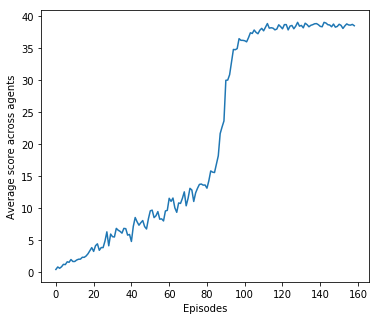

In [15]:
plot(a2c_ep_rewards_list)

Clearly this produced a very good learning run.  But I'm not totally convinced this wasn't a fluke.  However a sigma of `exp(-0.5)` produced to quickest learning.

## Trying A2C model with entropy

I modified the "learn" function to include an entropy term to ensure good exploration.

In [10]:
N_INPUTS = 33
N_ACTIONS = 4
GAMMA = 0.99 # reward discount rate
std = np.exp(-0.5)

In [11]:
def learn(batch_s, batch_a, batch_v_t, model, optimizer, beta):
    '''
    Params
    ======
        batch_s (T, n_process, state_size) (numpy)
        batch_a (T, n_process, action_size) (numpy): batch of actions
        batch_v_t (T, n_process) (numpy): batch of n-step rewards (aks target value)
        model (object): A2C model
        optimizer (object): model parameter optimizer
    Returns
    ======
        total_loss (int): mean actor-critic loss for each batch 
    '''

    # convert to tensors
    batch_s_ = torch.from_numpy(batch_s).float().to(device)
    batch_s_ = batch_s_.view(-1, batch_s.shape[-1]) # shape from (T,n_process,state_size) -> (TxN, state_size)

    batch_a_ = torch.from_numpy(batch_a).float().to(device)
    batch_a_ = batch_a_.view(-1, batch_a.shape[-1]) # shape from (T,n_process,action_size) -> (TxN, action_size)

    # generated critic values
    values = model.get_state_value(batch_s_) # shape (TxN,) - from the critic
    values = values.view(*batch_s.shape[:2]) # shape (T,n) - resphape back to T and n_processes

    # pytorch's problem of negative stride -> require .copy() to create new numpy
    batch_v_t_ = torch.from_numpy(batch_v_t.copy()).float().to(device)
    
    # calculate MSE loss between critic values and discounted values from trajectories
    td = batch_v_t_ - values # shape (T, n_process) (tensor)
    c_loss = td.pow(2).mean()

    mus, stds, log_probs, entropy = model.get_action_prob(batch_s_, batch_a_)
    log_probs_ = log_probs.view(*batch_a.shape[:2]) # shape from (TxN,) -> (T,n) (tensor) - resphape back to T and n_processes

    a_loss = -((log_probs_ * td.detach()).mean())
    total_loss = a_loss + 0.5 * c_loss - (beta * entropy().mean()) 

    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    # stds is constnat -> no gradient, no detach()
    return total_loss.detach().cpu().data.numpy(), mus.detach().cpu().data.numpy(), stds.cpu().data.numpy()

In [12]:
from collections import deque
from workspace_utils import active_session

torch.backends.cudnn.deterministic = True
torch.manual_seed(999)

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

agent_a2c = A2CModel().to(device)
optimizer = torch.optim.Adam(agent_a2c.parameters(), lr=0.00015)

env_info = env.reset(train_mode=True)[brain_name] 
states = env_info.vector_observations
init_states = states

n_episodes = 1
n_steps = 10
episode_end = False
a2c_ep_rewards_list = []
ep_rewards_deque = deque([0], maxlen=100) # initialize with 0
ep_rewards = 0
max_episodes = 400
tic = time.perf_counter()

beta = 0.001  # initial beta to use for entropy calculations

with active_session():
    while True:
        batch_s, batch_a, batch_v_t, accu_rewards, init_states, episode_end = collect_trajectories(
            agent_a2c, env, brain_name, init_states, episode_end, n_steps)

        loss, mus, stds = learn(batch_s, batch_a, batch_v_t, agent_a2c, optimizer, beta)
        ep_rewards += accu_rewards
        print('\rEpisode {:>4}\tEpisodic Score {:>7.3f}\tCurrent Score {:>7.3f}\tLoss {:>12.6f}\tbeta {:>6.5f}'.format(
            n_episodes, np.mean(ep_rewards_deque), ep_rewards_deque[-1], float(loss), beta), end="")

        if episode_end:

            a2c_ep_rewards_list.append(ep_rewards/num_agents)
            ep_rewards_deque.append(ep_rewards/num_agents)
            
            if n_episodes % 100 == 0:
                toc = time.perf_counter()
                print('\rEpisode {:>4}\tEpisodic Score {:>7.3f}\tCurrent Score {:>7.3f}\tLoss {:>12.6f}\tTime {:>4} sec'.format(
                    n_episodes, np.mean(ep_rewards_deque), ep_rewards_deque[-1], float(loss), int(toc-tic)))
                tic = time.perf_counter()

            if np.mean(ep_rewards_deque) >= 30:
                print('\nSolved at episode {}'.format(n_episodes - 100))
                break
            if n_episodes > max_episodes:
                print('\nDid not solve, achieved a high averaged score of {:>7.3f}'.format(np.mean(ep_rewards_deque)))
                break

            ep_rewards = 0
            n_episodes += 1
            episode_end = False

            beta *= 0.999  # discount beta with each episode

    # save a2c model
    pth = 'a2c_checkpoint_beta_std_' + str(std) + '.pth'
    torch.save(agent_a2c.state_dict(), pth)

    a2c_ep_rewards_list = np.array(a2c_ep_rewards_list)
    np.save('a2c_ep_rewards_list_beta_std_' + str(std) + '.npy', a2c_ep_rewards_list)

Episode  100	Episodic Score  10.625	Current Score  36.216	Loss    39.208061	Time  467 sec
Episode  159	Episodic Score  29.913	Current Score  38.707	Loss    -0.877051	beta 0.00085
Solved at episode 59


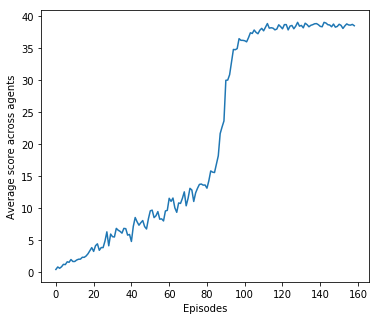

In [13]:
plot(a2c_ep_rewards_list)

Adding entropy basically didn't impact the learning rate.  Perhaps it could reduce the variability of the learning over many random seeds?

## Trying A2C model with trainable sigma

In place of a fixed, hard-coded sigma and a Normal distribution of output actions I tried a trainable sigma for the Normal disribution.  However I could not get the system to learn.

In [16]:
N_INPUTS = 33
N_ACTIONS = 4
GAMMA = 0.99 # reward discount rate
std = 'trainable'

In [20]:
class A2CModel(nn.Module):
    def __init__(self):
        super(A2CModel, self).__init__()
        self.fc1 = nn.Linear(N_INPUTS, 128)
        self.fc2 = nn.Linear(128, 128)
        self.actor = nn.Linear(128, N_ACTIONS)
        self.critic = nn.Linear(128, 1)
        #self.std = (0.5 * torch.ones(N_ACTIONS)).to(device)
        self.std = nn.Linear(128, N_ACTIONS, bias=True)
        self.std.bias.data.fill_(0.4)         # initialize close to 0.5
        self.dist = torch.distributions.Normal

    def forward(self, s):
        '''
        Params
        ======
            s (n_process, state_size) (tensor): states
        '''
        s = F.relu(self.fc1(s))
        s = F.relu(self.fc2(s))

        return s
    
    def get_action(self, s):
        '''
        Params
        ======
            s (n_process, state_size) (tensor): states
        Returns
        ======
            action_tanh (n_process, action_size) (tensor): action limited within (-1,1)
            action (n_process, action_size) (tensor): raw action
        '''
        s = self.forward(s)
        mu = self.actor(s)
        std = F.softplus(self.std(s)) + 0.1     # constrain so it doesn't get too low
        dist_ = self.dist(mu, std)
        action = dist_.sample()
        action_tanh = F.tanh(action)
        return action_tanh, action
    
    def get_action_prob(self, s, a):
        '''
        Params
        ======
            s (n_process, state_size) (tensor): states
            a (n_process, action_size) (tensor): actions
        
        Returns
        =======
            mu (n_process, action_size) (tensor): mean value of action distribution
            self.std (action_size,) (tensor): the standard deviation of every action
            log_prob (n_process,) (tensor): log probability of input action
        '''
        
        s = self.forward(s)
        mu = self.actor(s)
        std = F.softplus(self.std(s)) + 0.1     
        dist_ = self.dist(mu, std)
        log_prob  = dist_.log_prob(a)
        log_prob = torch.sum(log_prob, dim=1, keepdim=False)
        entropy = dist_.entropy
        return mu, std, log_prob, entropy
        
    def get_state_value(self, s):
        '''
        Params
        ======
            s (n_process, state_size) (tensor): states
        Returns
        =======
            value (n_process,) (tensor)
        '''
        s = self.forward(s)
        value = self.critic(s).squeeze(1)
        return value

In [21]:
from collections import deque
from workspace_utils import active_session

torch.backends.cudnn.deterministic = True
torch.manual_seed(999)

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

agent_a2c = A2CModel().to(device)
optimizer = torch.optim.Adam(agent_a2c.parameters(), lr=0.00015)

env_info = env.reset(train_mode=True)[brain_name] 
states = env_info.vector_observations
init_states = states

n_episodes = 1
n_steps = 10
episode_end = False
a2c_ep_rewards_list = []
ep_rewards_deque = deque([0], maxlen=100) # initialize with 0
ep_rewards = 0
max_episodes = 400
tic = time.perf_counter()

beta = 0.0  # initial beta to use for entropy calculations

with active_session():
    while True:
        batch_s, batch_a, batch_v_t, accu_rewards, init_states, episode_end = collect_trajectories(
            agent_a2c, env, brain_name, init_states, episode_end, n_steps)

        loss, mus, stds = learn(batch_s, batch_a, batch_v_t, agent_a2c, optimizer, beta)
        ep_rewards += accu_rewards
        print('\rEpisode {:>4}\tEpisodic Score {:>7.3f}\tCurrent Score {:>7.3f}\tLoss {:>12.6f}\t'.format(
            n_episodes, np.mean(ep_rewards_deque), ep_rewards_deque[-1], float(loss)), end="")

        if episode_end:

            a2c_ep_rewards_list.append(ep_rewards/num_agents)
            ep_rewards_deque.append(ep_rewards/num_agents)
            
            if n_episodes % 100 == 0:
                toc = time.perf_counter()
                print('\rEpisode {:>4}\tEpisodic Score {:>7.3f}\tCurrent Score {:>7.3f}\tLoss {:>12.6f}\tTime {:>4} sec'.format(
                    n_episodes, np.mean(ep_rewards_deque), ep_rewards_deque[-1], float(loss), int(toc-tic)))
                tic = time.perf_counter()

            if np.mean(ep_rewards_deque) >= 30:
                print('\nSolved at episode {}'.format(n_episodes - 100))
                break
            if n_episodes > max_episodes:
                print('\nDid not solve, achieved a high averaged score of {:>7.3f}'.format(np.mean(ep_rewards_deque)))
                break

            ep_rewards = 0
            n_episodes += 1
            episode_end = False

            beta *= 0.999  # discount beta with each episode

    # save a2c model
    pth = 'a2c_checkpoint_std_beta_beta' + str(std) + '.pth'
    torch.save(agent_a2c.state_dict(), pth)

    a2c_ep_rewards_list = np.array(a2c_ep_rewards_list)
    np.save('a2c_ep_rewards_list_beta_std' + str(std) + '.npy', a2c_ep_rewards_list)

Episode  100	Episodic Score   5.413	Current Score  11.093	Loss    50.027122	Time  478 sec
Episode  200	Episodic Score  15.351	Current Score  10.923	Loss   123.160324	Time  473 sec
Episode  300	Episodic Score  10.100	Current Score   2.754	Loss    59.754883	Time  472 sec
Episode  400	Episodic Score   3.517	Current Score   5.214	Loss   158.309402	Time  462 sec
Episode  401	Episodic Score   3.517	Current Score   5.214	Loss   103.751259	
Did not solve, achieved a high averaged score of   3.545


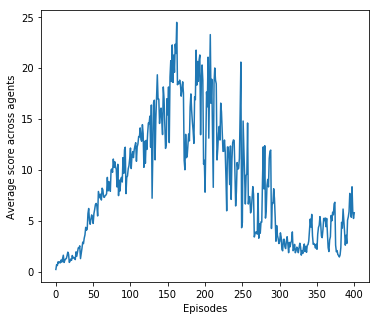

In [22]:
plot(a2c_ep_rewards_list)